# Lecture 7 – Data 100, Spring 2024

Data 100, Spring 2024

[Acknowledgments Page](https://ds100.org/sp24/acks/)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

In [8]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [9]:
wb.shape

(166, 47)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**. 

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [11]:
wb["Continent"].value_counts()

Continent
Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: count, dtype: int64

In Data 8, you used the `datascience` library to generate plots. The code to plot the distribution of the `"Maternal Smoker"` column may have looked like this:
```python

from datascience import Table
t = Table.from_df(wb["Continent"].value_counts().reset_index())
t.barh("index", "Continent")
```

In Data 100, we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. First, let's generate a bar plot using the Matplotlib function `plt.bar`.

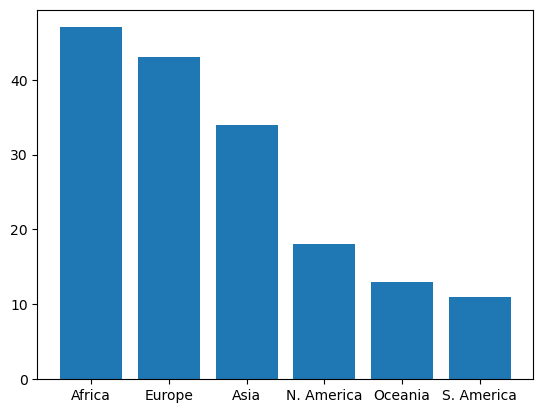

In [12]:
continents = wb["Continent"].value_counts()
plt.bar(continents.index, continents.values);
plt.show()

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate, however, we will see extraneous text as well:

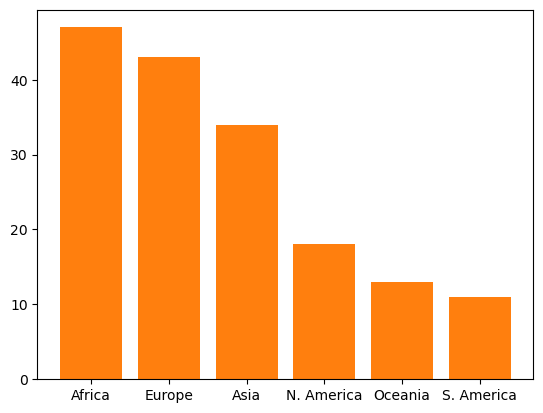

In [15]:
plt.bar(continents.index, continents)
plt.show()

We also remember to set the axis labels and the title for the plot.

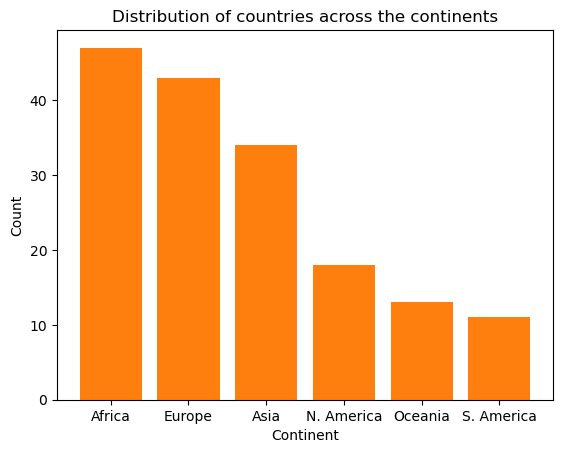

In [17]:
plt.bar(continents.index, continents)

plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Distribution of countries across the continents");
plt.show()

`pandas` native plotting:

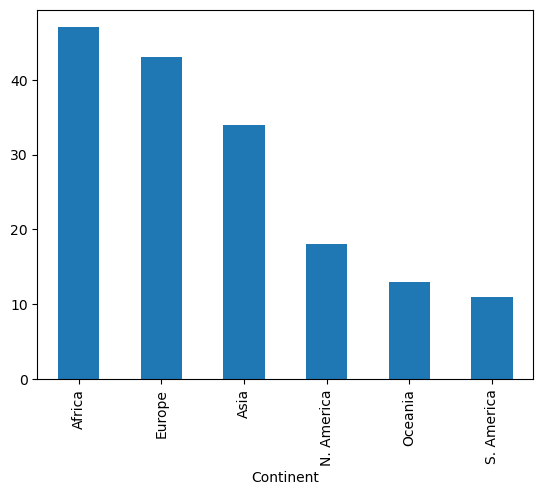

In [21]:
wb["Continent"].value_counts().plot(kind='bar');
plt.show()

Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

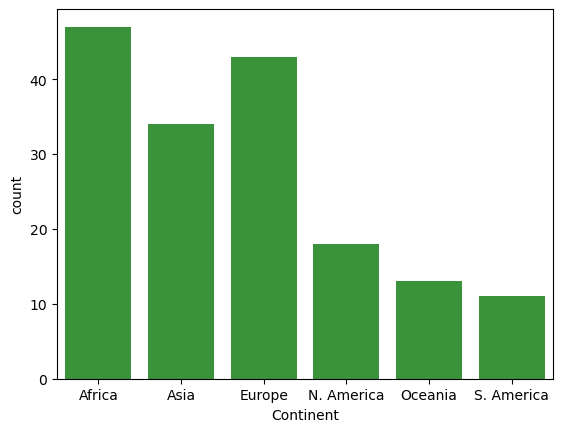

In [24]:
sns.countplot(data=wb, x='Continent');
plt.show()

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

In [28]:
wb["Gross national income per capita, Atlas method: $: 2016"]

0       4270.0
1       3440.0
2        820.0
3       6610.0
5        280.0
        ...   
188     4250.0
189     4070.0
190     5950.0
191     7070.0
192    15230.0
Name: Gross national income per capita, Atlas method: $: 2016, Length: 166, dtype: float64

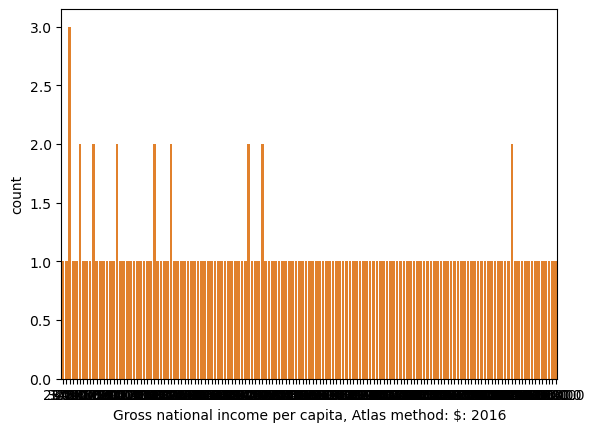

In [ ]:
sns.countplot(data=wb, x='Gross national income per capita, Atlas method: $: 2016');
plt.show()

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value. 

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

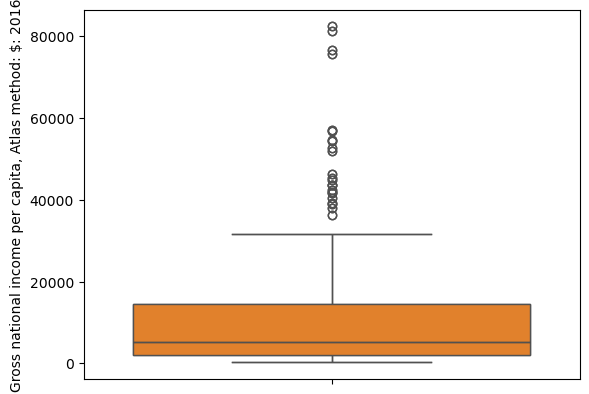

In [30]:
sns.boxplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");
plt.show()

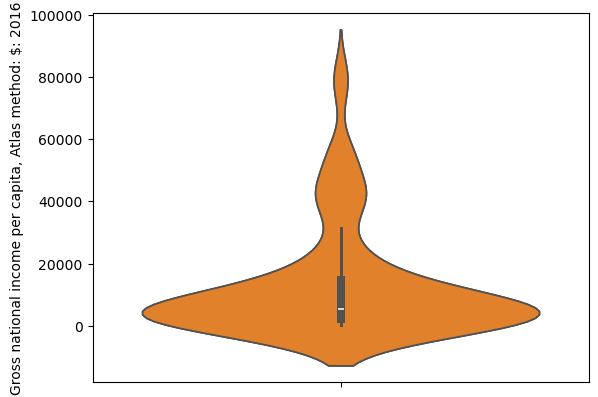

In [32]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");
plt.show()

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

In [35]:
wb

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,S. America,Guyana,87.0,81.0,NaN,NaN,92.0,94.0,82.0,87.0,...,76.0,84.0,99.0,95.0,84.0,29.0,7.4,7.4,69.0,80.0
189,S. America,Paraguay,89.0,90.0,71.0,77.0,99.0,98.0,96.0,94.0,...,52.0,89.0,83.0,93.0,NaN,NaN,NaN,NaN,71.0,87.0
190,S. America,Peru,99.0,100.0,84.0,87.0,99.0,99.0,97.0,90.0,...,53.0,76.0,92.0,90.0,60.0,57.0,NaN,NaN,87.0,80.0
191,S. America,Suriname,90.0,99.0,36.0,65.0,98.0,99.0,95.0,94.0,...,NaN,79.0,94.0,89.0,76.0,61.0,43.4,0.0,77.0,80.0


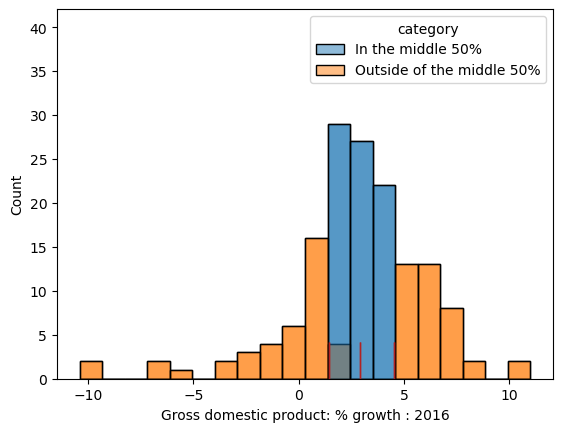

In [34]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);
plt.show()

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

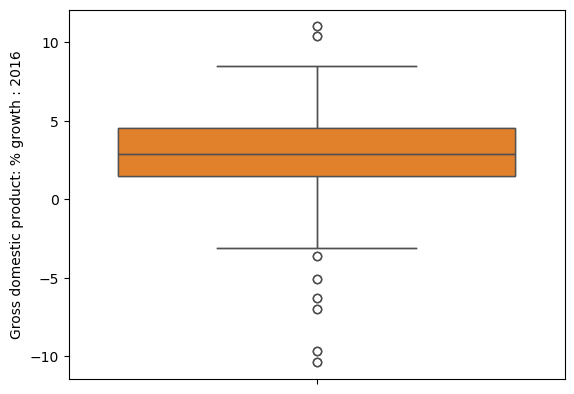

In [37]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');
plt.show()

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

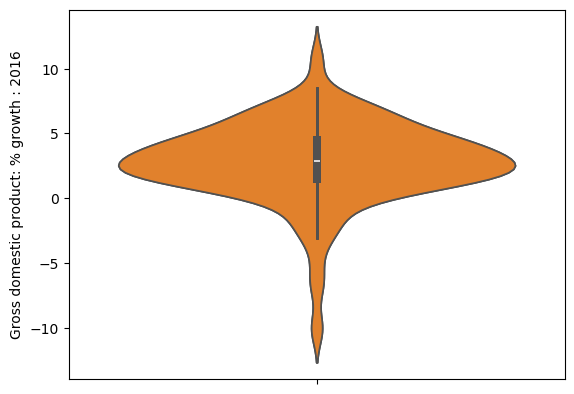

In [39]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016');
plt.show()

Plotting side-by-side box or violin plots allow us to compare distributions across different categories. In other words, they enable us to plot *both* a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specify both an `x` and `y` column.

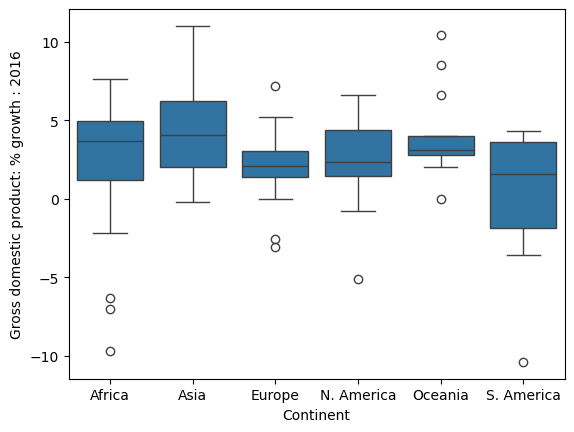

In [42]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');
plt.show()

## Histograms

You are likely familiar with histograms from Data 8. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

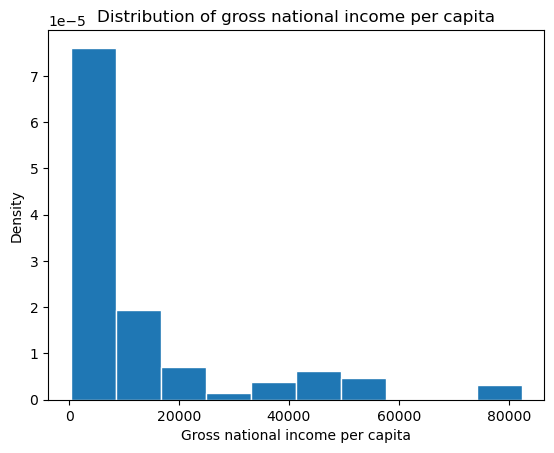

In [46]:
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");
plt.show()

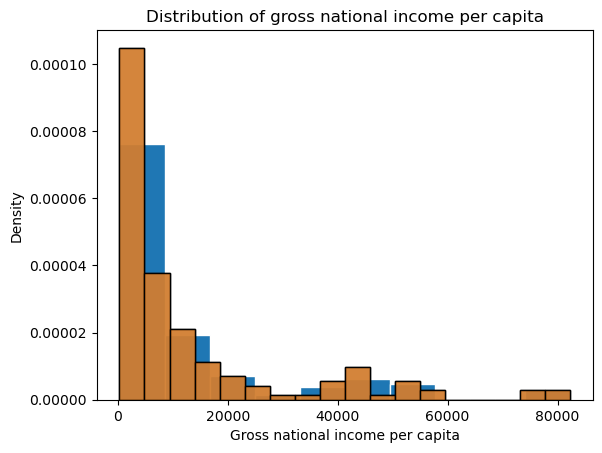

In [45]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");
plt.show()

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [47]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

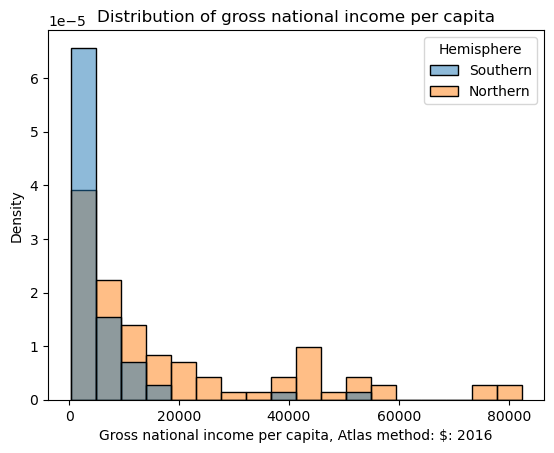

In [48]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");
plt.show()

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

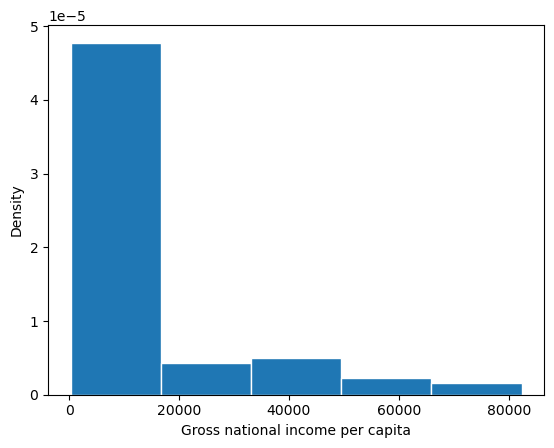

[4.77415899e-05 4.26957308e-06 5.04585910e-06 2.32885804e-06
 1.55257203e-06]
[  280. 16690. 33100. 49510. 65920. 82330.]
First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


In [52]:
densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.show()
print(densities)
print(bins)
print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

In Data 100, we describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot. 

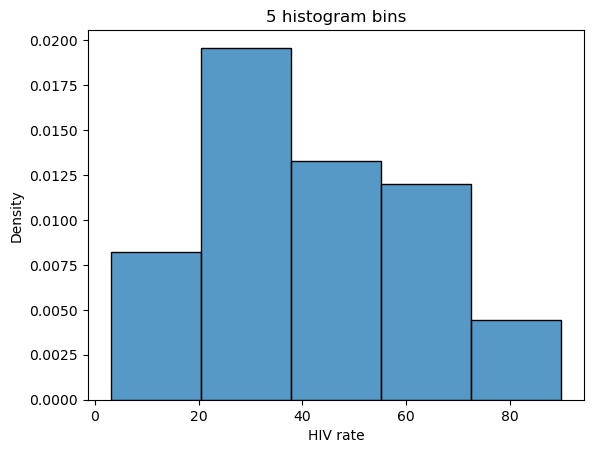

In [53]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})

# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");
plt.show()

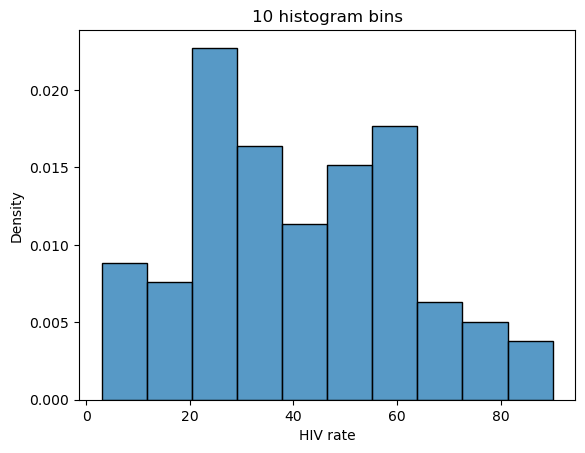

In [54]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");
plt.show()

In [ ]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail.

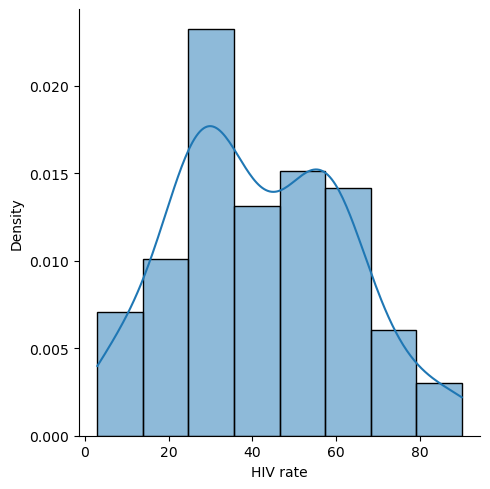

In [55]:
# The smooth curve overlaid on the histogram is a KDE
sns.displot(data=wb, x="HIV rate", kde=True, stat="density");
plt.show()

To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [57]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

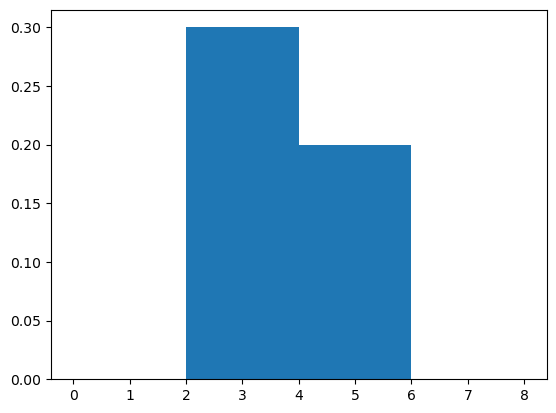

In [ ]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True); # 默认把bin标注在整数位置
plt.show()

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [59]:
def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0

def boxcar(x, z, a):
    # Boxcar kernel
    cond = np.abs(x - z)
    return np.piecewise(x, [cond <= a/2, cond > a/2], [1/a, 0] )

In [60]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show();

Here are our five points represented as vertical bars.

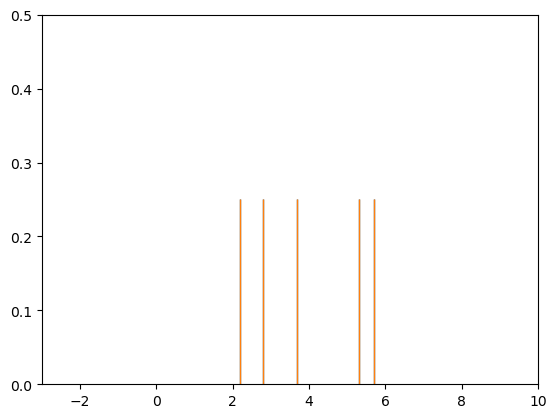

In [62]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5);
plt.show()

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

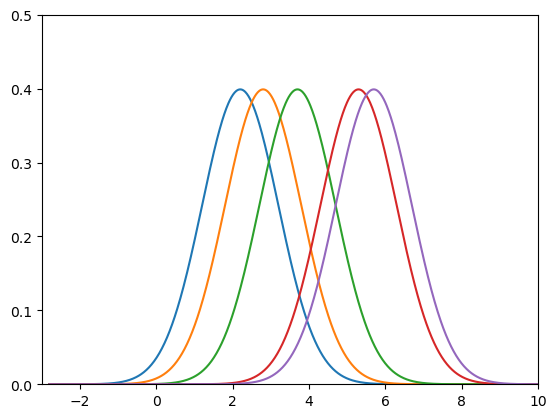

In [63]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1);
plt.show()

### Step 2: Normalize kernels so that total area is 1

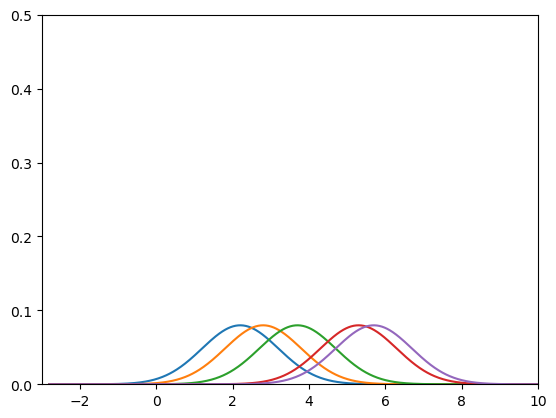

In [ ]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1, norm = True); # 每个核函数的面积为1/n
plt.show()

### Step 3: Sum all kernels together

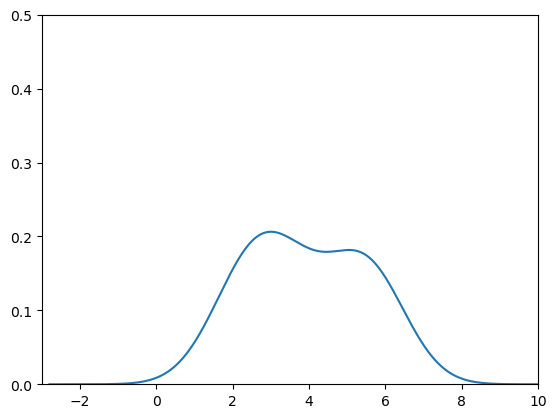

In [ ]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_kde(gaussian, points, a = 1) # KDE(x) = (1/n) * Σ K((x - xi)/a)
plt.show()

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

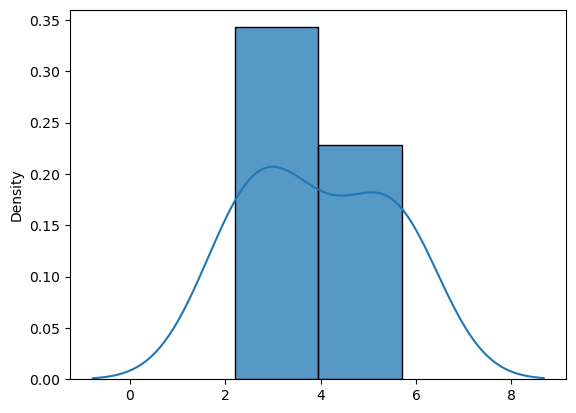

In [66]:
sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2);
plt.show()

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

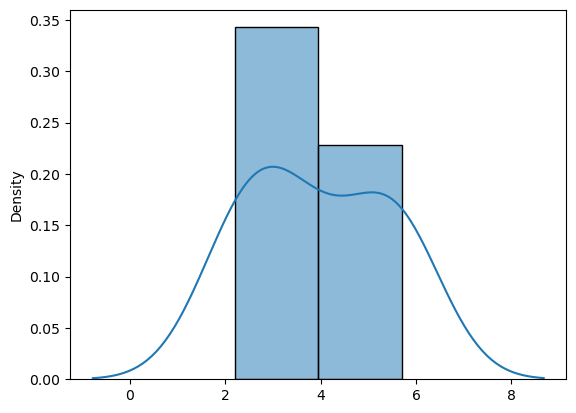

In [67]:
sns.histplot(points, bins=2, kde=True, stat='density', 
             kde_kws=dict(cut=3, bw_method=0.65));
plt.show()

In [ ]:
sns.kdeplot(points, bw_adjust=2)
sns.histplot(points, stat='density');

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

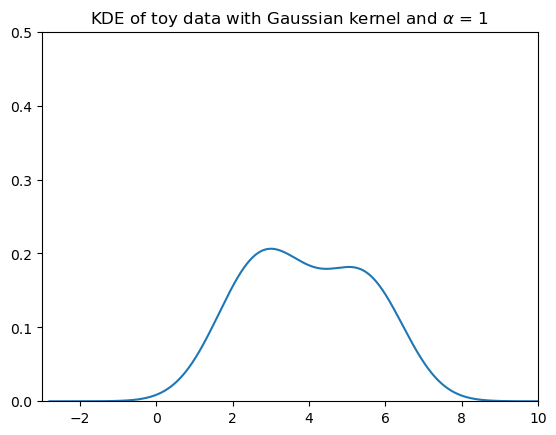

In [68]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, points, a = 1)
plt.show()

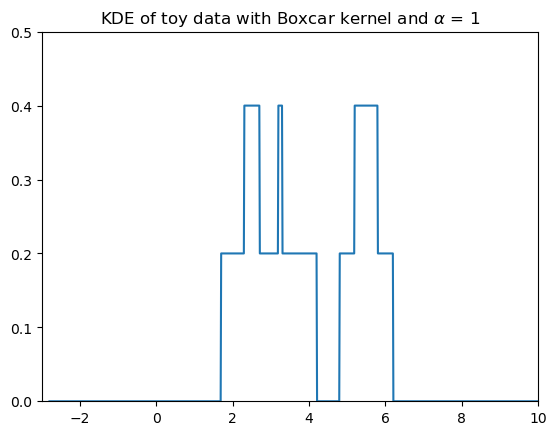

In [69]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
plot_kde(boxcar, points, a = 1)
plt.show()

## Effect of bandwidth hyperparameter $\alpha$

Let's bring in some (different) toy data.

In [70]:
tips = sns.load_dataset('tips')

KeyboardInterrupt: 

In [ ]:
tips.head()

In [ ]:
vals = tips['total_bill']

In [ ]:
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

In [ ]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.15)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plot_kde(gaussian, vals, a = 0.1)

In [ ]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, vals, a = 1)

In [ ]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
plot_kde(gaussian, vals, a = 2)

In [ ]:
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 10')
plot_kde(gaussian, vals, a = 5)